# **Análisis Exploratorio de Datos (EDA)**

## **Importación de librerías**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt

In [2]:
sns.set(style="whitegrid")

## **Conjunto de Datos**

**Acerca del set de datos:**

Los datos para usar son el conjunto de datos Emothaw, es un set de datos explícitamente diseñado al estudio de emociones usando análisis y patrones en la escritura.

Incluye muestras escritas a mano recopiladas de participantes en diferentes estados emocionales.

Estos estados emocionales a menudo se inducen mediante métodos psicológicos validados, como videos o estímulos diseñados para provocar emociones (por ejemplo, felicidad, tristeza, ira, etc.).

### **Carga de conjunto de datos**


Los datos se encuentran en formato .csv, estos datos fueron juntados anteriormente junto con sus propias etiquetas y guardados en un documento. parquet, el cual usamos para cargar la información de manera mas sencilla.

In [3]:
file_path = '/content/labeled_data_timeseries.parquet'
df = pd.read_parquet(file_path)

In [4]:
#file_path = '../data/raw_binary/labeled_data_timeseries.parquet'
#df = pd.read_parquet(file_path)

In [5]:
df.head()

,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
Subject,,,,,,,,,,,
1,1,0,"[48331, 48318, 48305, 48305, 48305, 48305, 483...","[31876, 31963, 32053, 32159, 32159, 32159, 321...","[672620, 672628, 672635, 672643, 672650, 67282...","[1830, 1830, 1830, 1830, 1830, 1830, 1830, 234...","[530, 530, 530, 530, 530, 530, 530, 350, 360, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,8,13
1,1,1,"[47944, 47949, 47949, 47950, 47950, 47950, 479...","[33492, 33506, 33512, 33515, 33519, 33524, 335...","[671854, 671861, 671869, 671876, 671884, 67189...","[1800, 1800, 1800, 1800, 1800, 1810, 1810, 181...","[490, 500, 500, 500, 500, 500, 500, 500, 500, ...","[67, 148, 193, 228, 270, 306, 341, 365, 381, 3...",2,8,13
1,2,0,"[41647, 41714, 41787, 41896, 41896, 41616, 416...","[14655, 14657, 14675, 14677, 14677, 15475, 154...","[692915, 692922, 692930, 692937, 692945, 69356...","[1830, 1830, 1830, 1840, 1840, 2530, 2530, 253...","[530, 530, 530, 530, 530, 450, 450, 450, 460, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,8,13
1,2,1,"[45074, 45128, 45144, 45158, 45164, 45169, 451...","[14676, 14676, 14679, 14689, 14696, 14701, 147...","[692434, 692441, 692449, 692456, 692464, 69247...","[1930, 1940, 1940, 1940, 1940, 1940, 1940, 194...","[510, 510, 510, 510, 510, 510, 510, 510, 510, ...","[50, 207, 282, 304, 377, 418, 426, 438, 447, 4...",2,8,13
1,3,0,"[33431, 33563, 33626, 33685, 33747, 33812, 338...","[35956, 35956, 35959, 35976, 35991, 36002, 360...","[724897, 724905, 724912, 724920, 724927, 72493...","[1760, 1760, 1760, 1760, 1760, 1760, 1770, 177...","[620, 610, 610, 610, 610, 610, 600, 600, 600, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,8,13


Como se puede observar, los datos cuentan con datos como:

*   **Subject** el cual nos dice el usuario al que se le hicieron las pruebas.

*   **pen_status** este nos muestra si la pluma se encuentra arriba (0) o abajo (1).

*   **X y Y** son coordenadas de los trazos en x y y.

*   **Azimuth** se refiere al ángulo entre la orientación del lápiz y una dirección de referencia en el plano de la superficie de la tableta.

*   **Altitude** se refiere al ángulo entre el lápiz y la superficie de la tableta.

*   **Pressure** Presión al escribir en la pluma.

*   Nuestras etiquetas serian los valores designados a las emociones como **depresión, ansiedad y estrés**.

## **Estructura de los Datos**

### **Forma del conjunto de datos**

In [6]:
print("Forma del conjunto de datos:", df.shape)

Forma del conjunto de datos: (1588, 11)


Podemos observar que nuestros datos actuales tienen la dimensión de (1588, 11), en otras palabras: 1588 filas y 11 columnas totales en todo el set de datos.

### **Tipos de datos y conteo de valores no nulos**

In [7]:
print("\nTipos de datos y conteo de valores no nulos:")
df.info()


Tipos de datos y conteo de valores no nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 1 to 129
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   homework    1588 non-null   int64 
 1   pen_status  1588 non-null   int64 
 2   x           1588 non-null   object
 3   y           1588 non-null   object
 4   timestamp   1588 non-null   object
 5   azimuth     1588 non-null   object
 6   altitude    1588 non-null   object
 7   pressure    1588 non-null   object
 8   depression  1588 non-null   int64 
 9   anxiety     1588 non-null   int64 
 10  stress      1588 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 148.9+ KB


Nuestros datos categoricos se consideraran los siguientes: homework, pen_status y las etiquetas pressure, depression y anxiety. Siendo un total de 5.

El resto de los datos: X, Y, timestamp, azimuth, altitude y pressure son arreglos de varios numero o en otras palabras son arreglos de tiempo. siendo un total de 6.


### **Resumen estadístico**

In [8]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas para columnas numéricas:


,homework,pen_status,depression,anxiety,stress
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,3.907431,0.570529,7.591310,7.935768,13.494962
std,2.127533,0.495157,6.013205,5.945322,7.566174
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000,8.000000
50%,4.000000,1.000000,6.000000,7.000000,13.500000
75%,6.000000,1.000000,10.000000,11.000000,17.000000
max,7.000000,1.000000,25.000000,31.000000,39.000000


Hay algunos datos interesantes y tendencias que podemos obtener, al observar el resumen estadístico de nuestro set de datos:

*   **homework:** Podemos observar que hay un mínimo de 0 tareas y 7 como máximo.

*   **pen_status:** El valor medio es 0,57, lo que sugiere que la mayoría de las muestras se encuentran con el valor de 1.

*   Las etiquetas **depression, anxiety y stress:** son puntuaciones psicológicas basadas en alguna prueba estándar.

*   **stress:** La desviación estándar, es de 7.57, lo cual indica una gran variabilidad en los resultados individuales totales.

*   **stress:** El 75% de los datos tiene un nivel de estrés de 17 o menos.

*   El valor máximo de **depression, anxiety y stress:** es 25, 15 y 39, respectivamente. El valor mas alto siendo 39 de **stress**.

### **Frecuencia de valores únicos para columnas de series de tiempo**

In [25]:
# Frecuencia de valores únicos para columnas categóricas sintetizada
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nFrecuencia de valores únicos para columnas de tiempo (mostrando los 5 valores más frecuentes por columna):")
    summary_frequency_table = {}
    for col in categorical_cols:
        value_counts = df[col].value_counts().head(5)
        summary_frequency_table[col] = value_counts

    frequency_list = []
    for col, value_counts in summary_frequency_table.items():
        for value, count in value_counts.items():
            frequency_list.append({"Columna": col, "Valor": value, "Frecuencia": count})

    frequency_df = pd.DataFrame(frequency_list)

frequency_df


Frecuencia de valores únicos para columnas de tiempo (mostrando los 5 valores más frecuentes por columna):


,Columna,Valor,Frecuencia
0,x,"[48331, 48318, 48305, 48305, 48305, 48305, 483...",1
1,x,"[13876, 13761, 13677, 13560, 13411, 13237, 130...",1
2,x,"[27028, 27025, 27024, 27024, 27021, 27019, 270...",1
3,x,"[26744, 26542, 26464, 26464, 26464, 26756, 267...",1
4,x,"[36128, 36140, 36147, 36152, 36157, 36161, 361...",1
5,y,"[31876, 31963, 32053, 32159, 32159, 32159, 321...",1
6,y,"[36838, 36841, 36864, 36897, 36945, 37009, 370...",1
7,y,"[12993, 13002, 13026, 13052, 13081, 13117, 131...",1
8,y,"[13920, 14100, 14196, 14196, 14196, 12607, 126...",1
9,y,"[8303, 8294, 8294, 8294, 8294, 8297, 8310, 832...",1


Creamos una nueva tabla para poder observar la frecuencia de valores de las series de tiempo por columna.

Por la naturaleza del set de datos son extraídos dinámicamente usando escritura digital, lo cual no es sorprendente que la mayoría o todos los datos son únicos, lo cual podemos confirmar observando la tabla.

### **Verificación de valores nulos**

In [10]:
print("\nValores faltantes en el conjunto de datos:")
df.isnull().sum()


Valores faltantes en el conjunto de datos:


,0
homework,0
pen_status,0
x,0
y,0
timestamp,0
azimuth,0
altitude,0
pressure,0
depression,0
anxiety,0


Por la naturaleza del set de datos, al ser datos recolectados por expertos que requerían realizar ejercicios manuales y repetirse en caso de que no se completar el ejercicio, nuestro set de datos no tiene ningún valor nulo.

Esto significa que no es necesario implementar algún método o algoritmo que nos ayude a llenar los datos nulos.

## **Análisis de Univariante**

### **Visualizaciones para Datos Numéricos**

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#### **Histogramas**

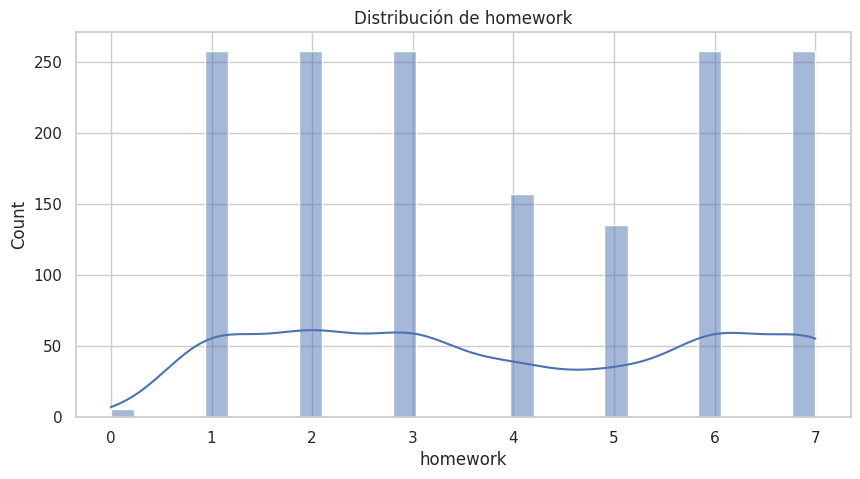

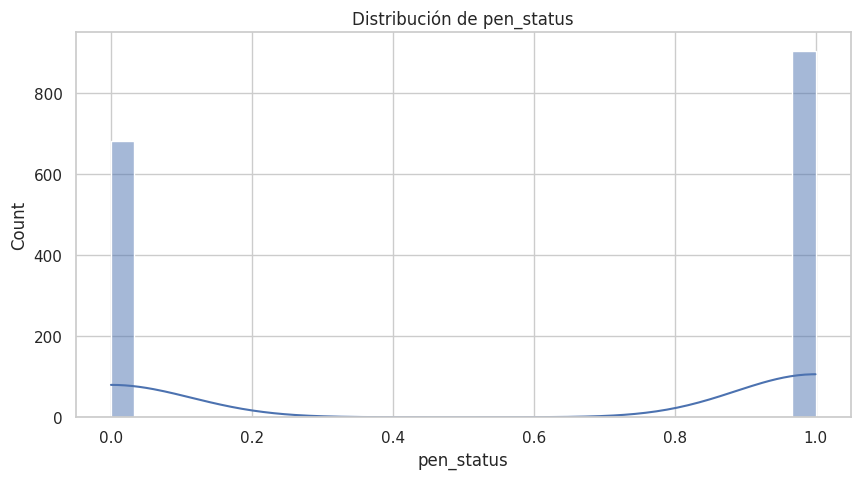

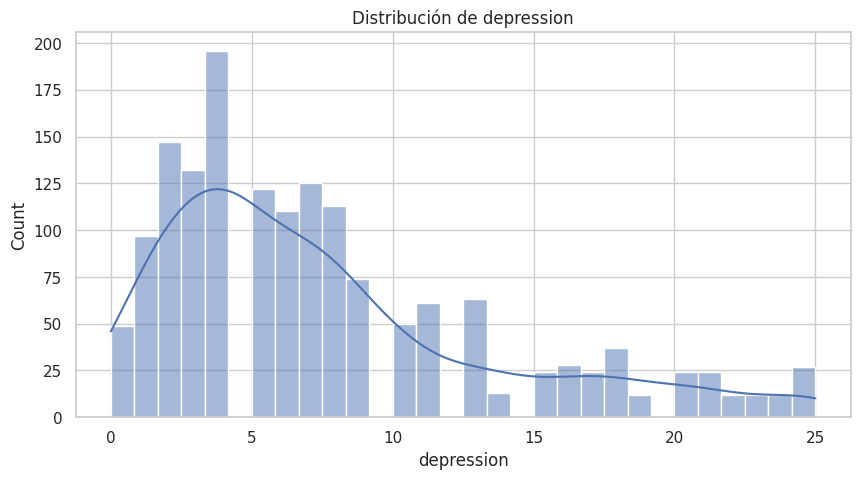

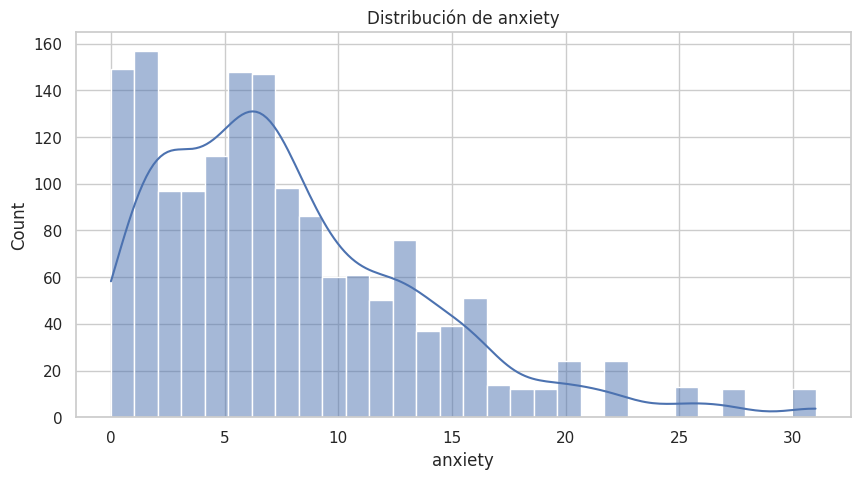

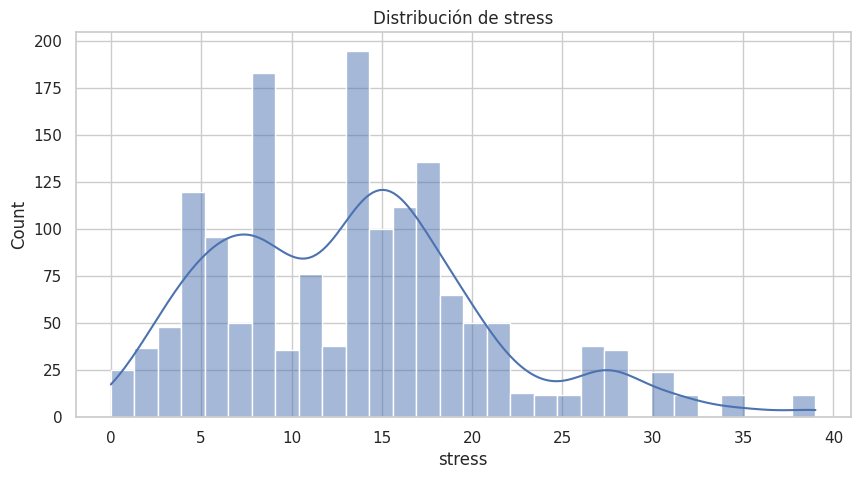

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.show()

Algunos datos mas que podemos obtener al ver las distribuciones:

*   **homework:** la mayoría de los datos se concentran en 1, 2, 3 o 6, y 7; 5 siendo el valor mas bajo total, sin contar el 0.

*   **pen_status**: como se había mencionado anteriormente, la mayoría de los datos se encuentra en el valor de 1

*   **depression:** La distribución parece estar sesgada a la izquierda, con la mayoría de los datos concentrados en el rango inferior (0-10).

*   **anxiety:** La distribución parece estar sesgada a la izquierda, con la mayoría de los datos concentrados en el rango inferior (0-15).

*   **stress:** La distribución parece estar sesgada a la izquierda, aunque no tanto como las otras 2 etiquetas, con la mayoría de los datos concentrados en el rango inferior (0-20) y llegando al máximo de casi 40, lo cual se podría considerar como un dato atípico.

Por lo general, podemos observar que la gente sufre baja a moderada cantidades de: depresión, ansiedad y estrés. Siendo mas raro las cantidades altas e inclusive individuos que sufran las 3 juntas.

#### **Diagramas de Caja**

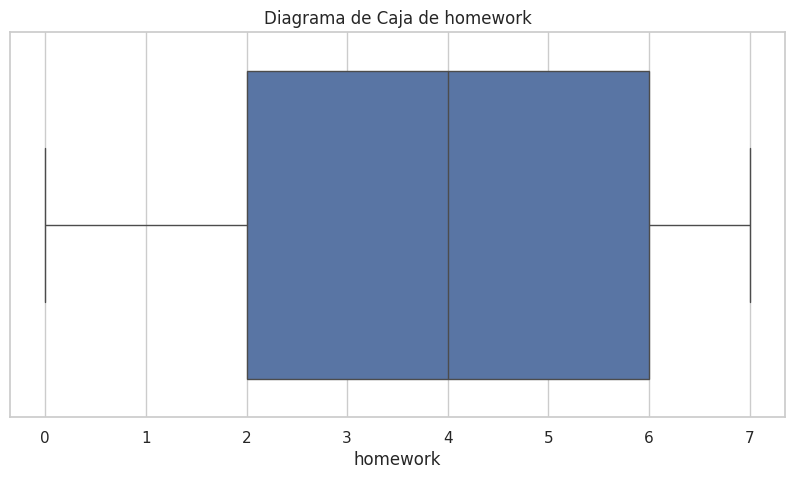

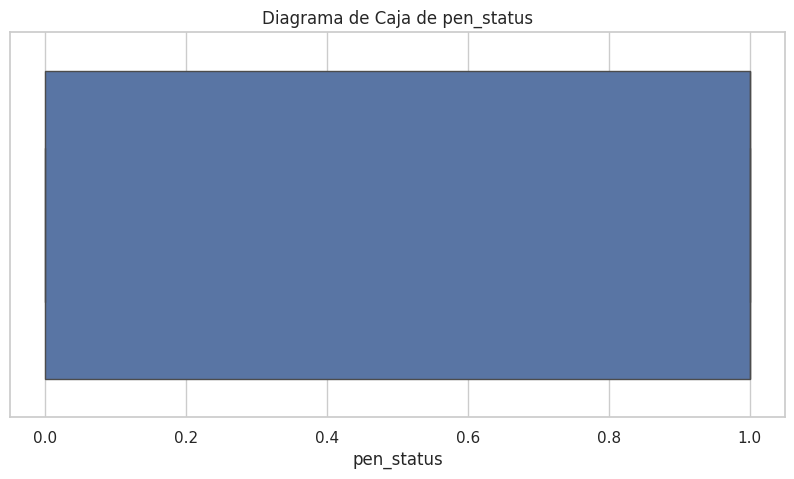

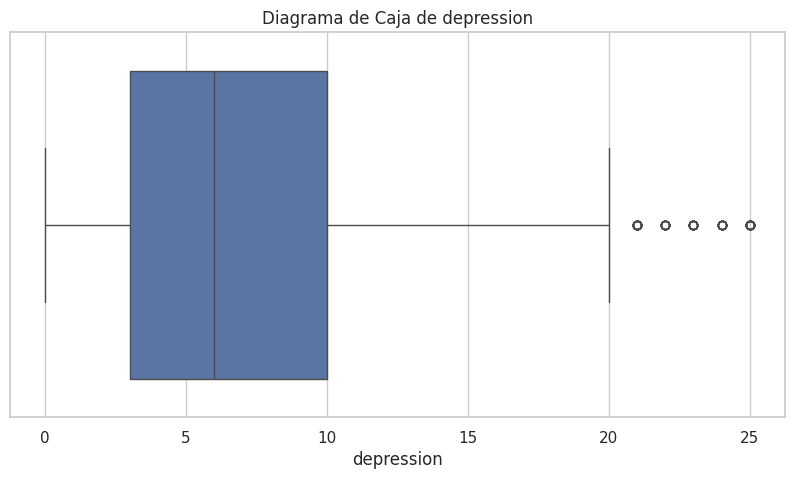

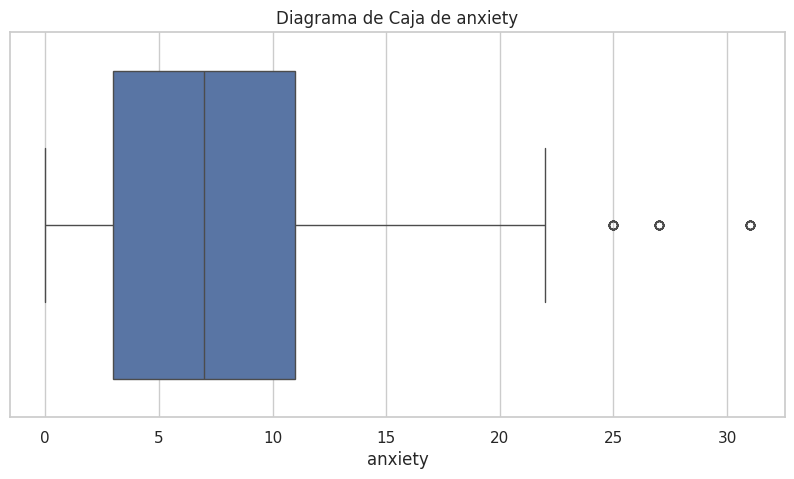

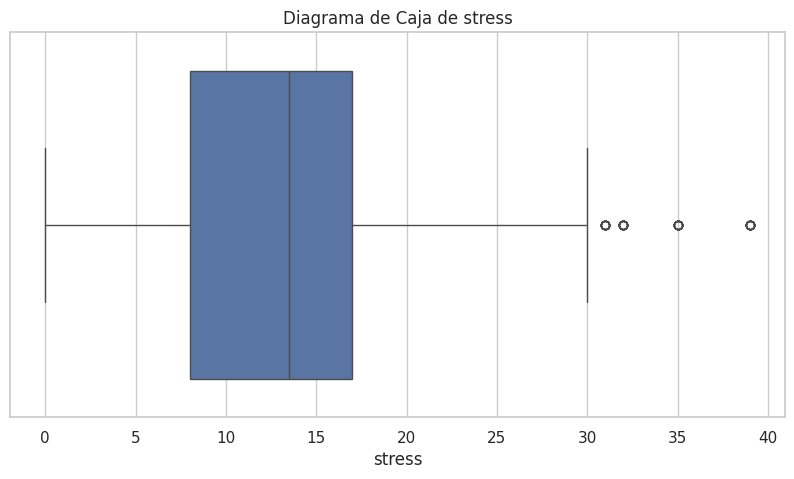

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Diagrama de Caja de {col}")
    plt.show()

Por lo general, podemos observar que la mayoría de los datos concentrados en rangos bajos o medios, solo en las etiquetas hay datos que se podrían considerar atípicos.

#### **Gráfico de conteo**

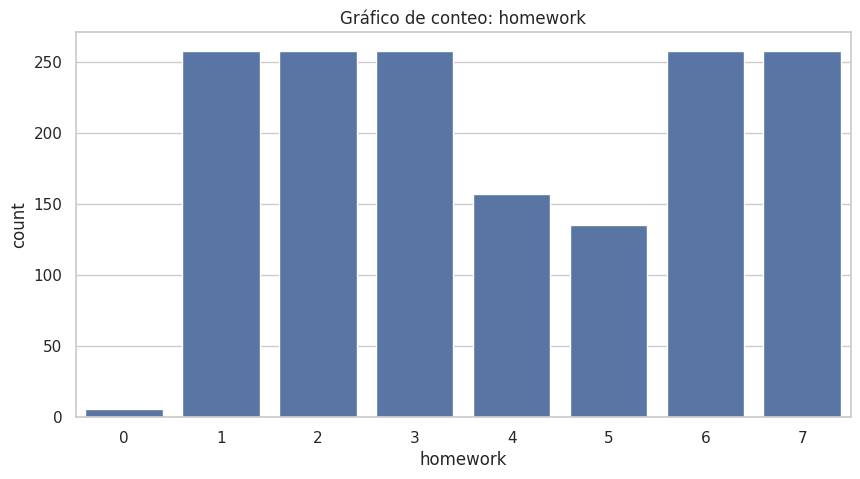

Cardinalidad: 8
Conteo y porcentajes:
          conteo  porcentaje
homework                    
1            258   16.246851
2            258   16.246851
3            258   16.246851
6            258   16.246851
7            258   16.246851
4            157    9.886650
5            135    8.501259
0              6    0.377834
Moda: 1



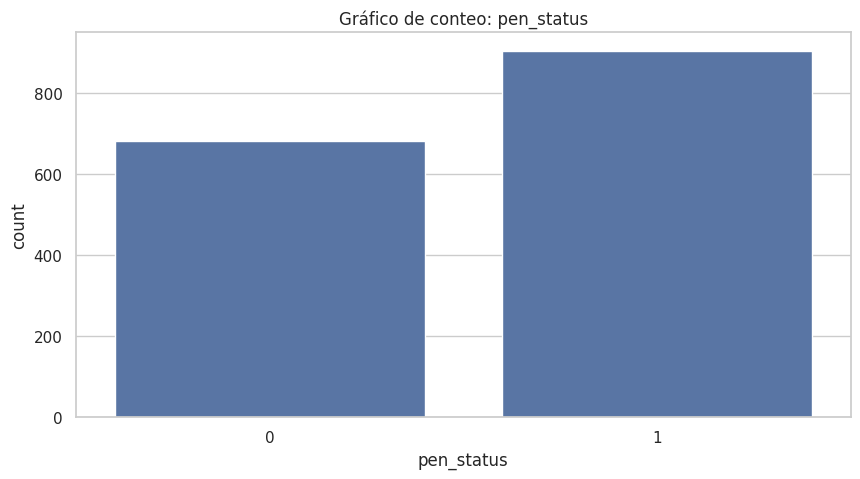

Cardinalidad: 2
Conteo y porcentajes:
            conteo  porcentaje
pen_status                    
1              906   57.052897
0              682   42.947103
Moda: 1



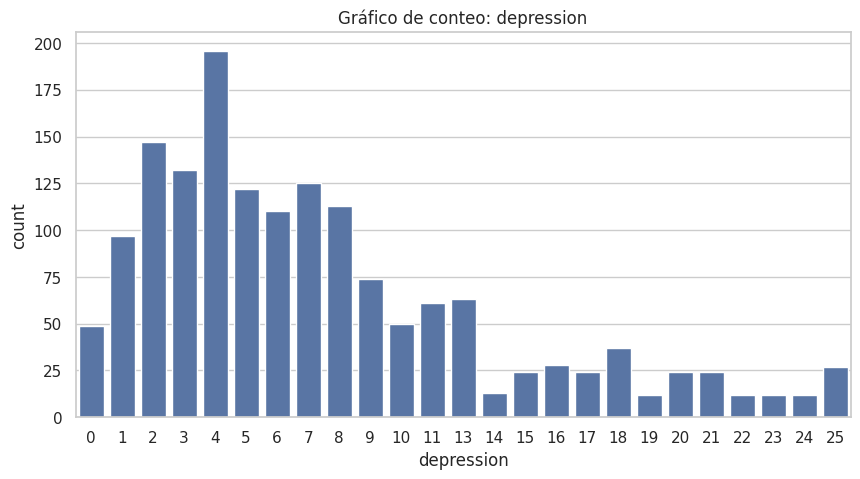

Cardinalidad: 25
Conteo y porcentajes:
            conteo  porcentaje
depression                    
4              196   12.342569
2              147    9.256927
3              132    8.312343
7              125    7.871537
5              122    7.682620
8              113    7.115869
6              110    6.926952
1               97    6.108312
9               74    4.659950
13              63    3.967254
11              61    3.841310
10              50    3.148615
0               49    3.085642
18              37    2.329975
16              28    1.763224
25              27    1.700252
17              24    1.511335
21              24    1.511335
15              24    1.511335
20              24    1.511335
14              13    0.818640
24              12    0.755668
23              12    0.755668
22              12    0.755668
19              12    0.755668
Moda: 4



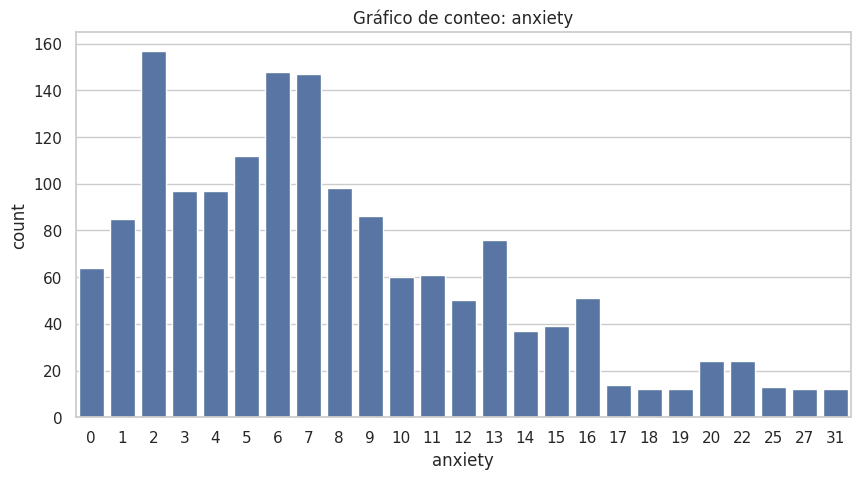

Cardinalidad: 25
Conteo y porcentajes:
         conteo  porcentaje
anxiety                    
2           157    9.886650
6           148    9.319899
7           147    9.256927
5           112    7.052897
8            98    6.171285
4            97    6.108312
3            97    6.108312
9            86    5.415617
1            85    5.352645
13           76    4.785894
0            64    4.030227
11           61    3.841310
10           60    3.778338
16           51    3.211587
12           50    3.148615
15           39    2.455919
14           37    2.329975
22           24    1.511335
20           24    1.511335
17           14    0.881612
25           13    0.818640
19           12    0.755668
31           12    0.755668
18           12    0.755668
27           12    0.755668
Moda: 2



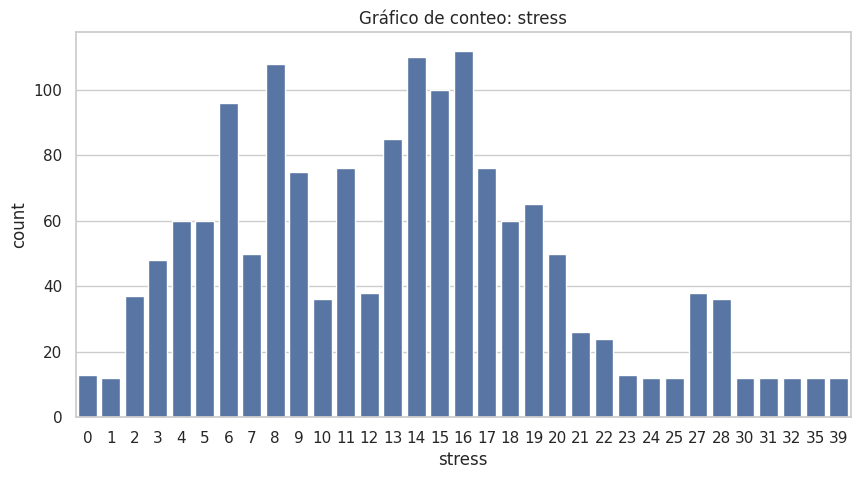

Cardinalidad: 33
Conteo y porcentajes:
        conteo  porcentaje
stress                    
16         112    7.052897
14         110    6.926952
8          108    6.801008
15         100    6.297229
6           96    6.045340
13          85    5.352645
17          76    4.785894
11          76    4.785894
9           75    4.722922
19          65    4.093199
5           60    3.778338
18          60    3.778338
4           60    3.778338
20          50    3.148615
7           50    3.148615
3           48    3.022670
27          38    2.392947
12          38    2.392947
2           37    2.329975
10          36    2.267003
28          36    2.267003
21          26    1.637280
22          24    1.511335
23          13    0.818640
0           13    0.818640
30          12    0.755668
32          12    0.755668
31          12    0.755668
1           12    0.755668
39          12    0.755668
35          12    0.755668
25          12    0.755668
24          12    0.755668
Moda: 16



In [30]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Gráfico de conteo: {col}")
    plt.show()

    # Cardinalidad
    cardinality = df[col].nunique()
    print(f"Cardinalidad: {cardinality}")

    # representacion de conteo
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    print("Conteo y porcentajes:")
    print(pd.DataFrame({'conteo': counts, 'porcentaje': percentages}))

    # Mode
    mode = df[col].mode()[0]
    print(f"Moda: {mode}\n")

Podemos obsevar nuevamente algunos detalles:

*   **Homework:** los datos parecen iguales a excepción de las tareas 4 y 5
*   **Pen_status:** hay un total de 906 valores en la pluma hacia arriba.
*   **depression, anxiety, stress**: podemos observar de manera visual que el estrés es mayor de las condiciones emocionales,siendo el valor más común 16


### **Visualizaciones para Datos Categóricos**

In [14]:
# TODO


## **Análisis Bivariado y Multivariado**

### **Análisis de Correlación para Variables Numéricas**

#### **Matriz de Correlación**

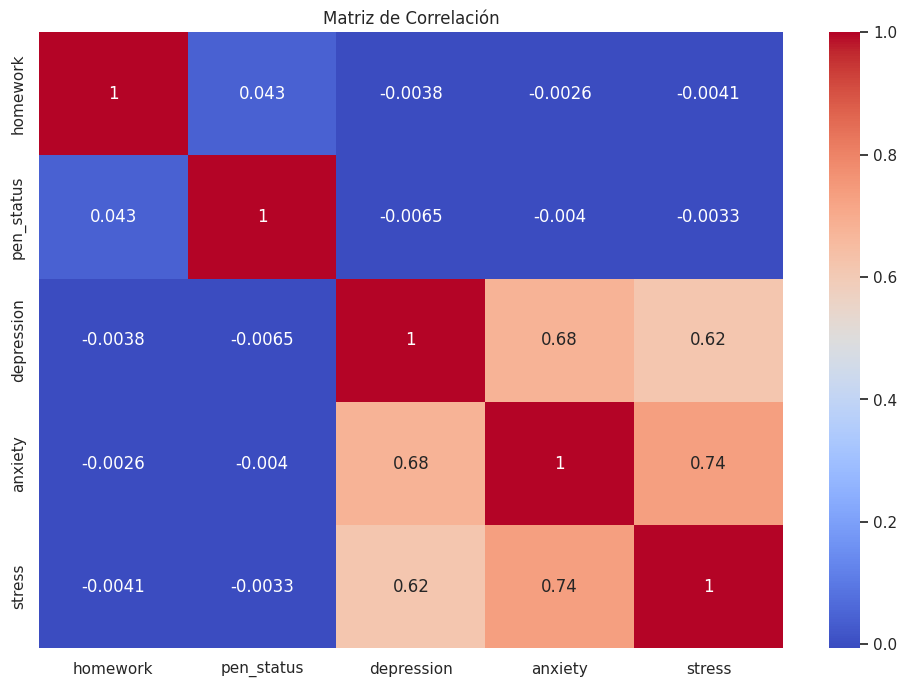

In [26]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

En el análisis de correlación podemos observar que nuestras etiquetas tienen alguna correlación, el resto de los datos no parecen estar correlacionados de la misma manera.

#### **Pairplots**

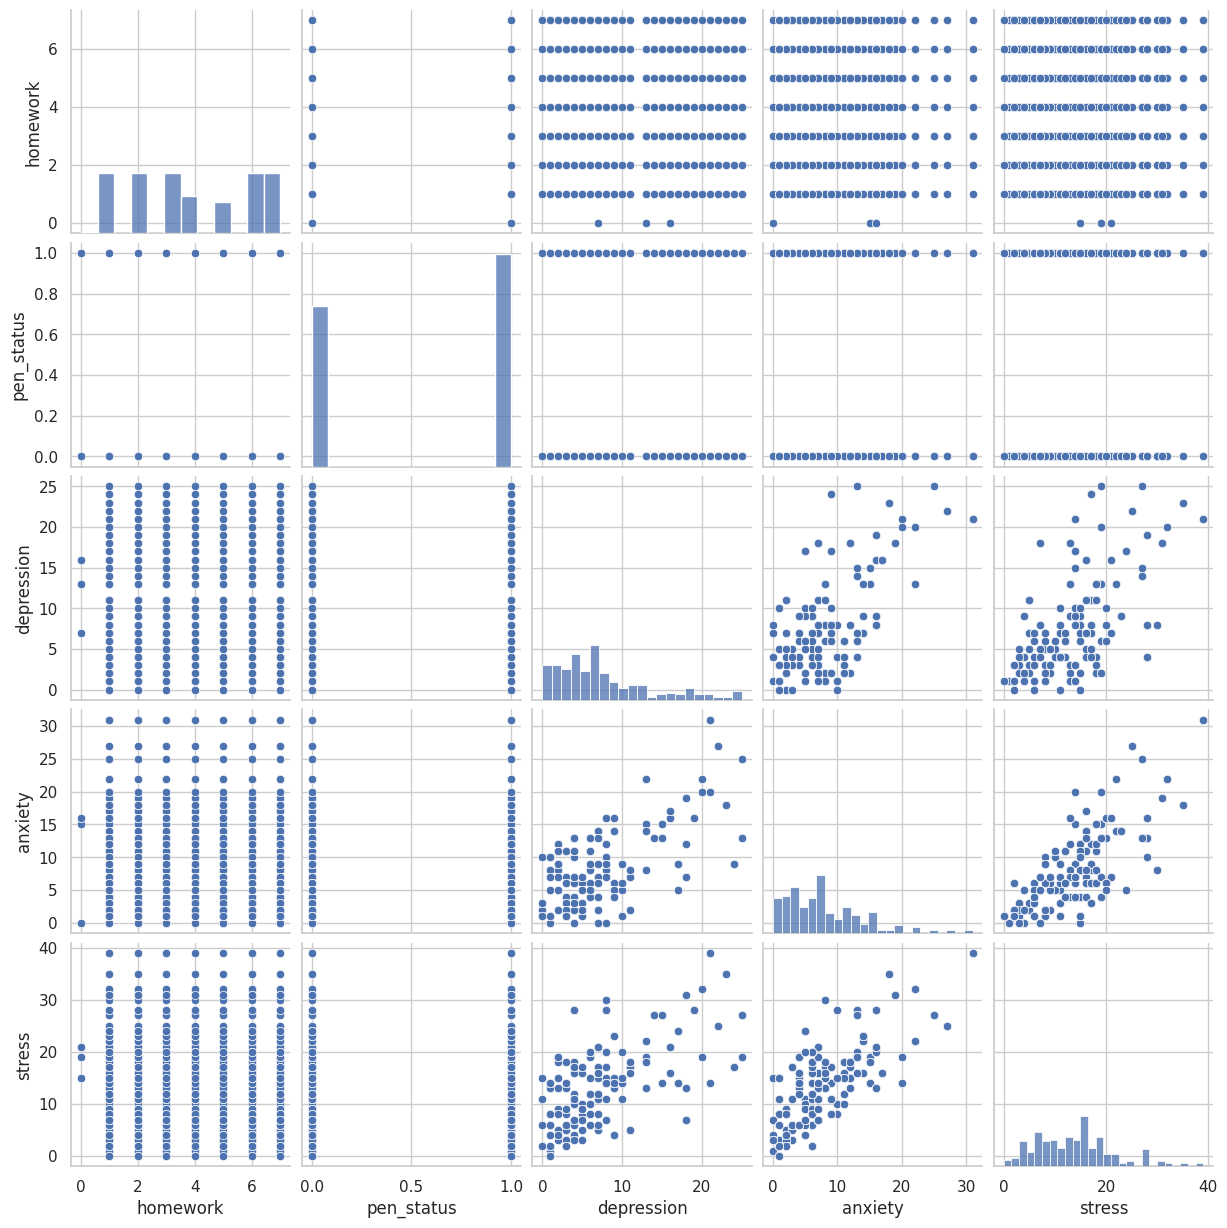

In [31]:
important_cols = numeric_cols[:5]
sns.pairplot(df[important_cols])
plt.show()

Complementando lo que se dijo anteriormente, podemos observar de manera visual la correlación que existe en nuestras etiquetas.

## **Análisis de Series de Tiempo**

### **Expansión de Columnas con listas del Dataframe**

In [17]:
# Expandir columnas con listas en filas separadas
df_expanded = df.explode(['x', 'y', 'timestamp', 'azimuth', 'altitude', 'pressure']).reset_index()

# Convertir columnas expandidas a numéricas
for col in ['x', 'y', 'timestamp', 'azimuth', 'altitude', 'pressure']:
    df_expanded[col] = pd.to_numeric(df_expanded[col])

# Mostrar las primeras filas del conjunto de datos expandido
df_expanded.head()

,Subject,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
0,1,1,0,48331,31876,672620,1830,530,0,2,8,13
1,1,1,0,48318,31963,672628,1830,530,0,2,8,13
2,1,1,0,48305,32053,672635,1830,530,0,2,8,13
3,1,1,0,48305,32159,672643,1830,530,0,2,8,13
4,1,1,0,48305,32159,672650,1830,530,0,2,8,13


In [18]:
def plot_subject_data(subject_id, pen_status, homework_id):
    """
    Función para graficar datos de dispersión para un sujeto específico,
    con un estado de lápiz y una tarea específicos.

    Parámetros:
    subject_id (int): ID del sujeto.
    pen_status (int): Estado del lápiz (activo/inactivo).
    homework_id (int): ID de la tarea.
    """
    # Filtrar los datos
    sample_subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                                      (df_expanded['pen_status'] == pen_status) &
                                      (df_expanded['homework'] == homework_id)]

    # Verificar si los datos filtrados no están vacíos
    if not sample_subject_data.empty:
        # Crear el gráfico de dispersión
        plt.figure(figsize=(5, 5))
        plt.scatter(-sample_subject_data['y'], sample_subject_data['x'], s=3, c='blue', alpha=0.6)
        plt.title(f"Gráfico de Dispersión: Sujeto {subject_id}, Estado del Lápiz {pen_status}, Tarea {homework_id}")
        plt.xlabel("Posición -y")
        plt.ylabel("Posición x")
        plt.grid(True)
        plt.show()
    else:
        print(f"No se encontraron datos para Sujeto {subject_id}, Estado del Lápiz {pen_status}, Tarea {homework_id}.")

In [19]:
def plot_series_data(subject_id, homework_id, pen_status):
    """
    Graficar las series temporales de las posiciones x e y para un sujeto específico.

    Parámetros:
    subject_id (int): ID del sujeto.
    homework_id (int): ID de la tarea.
    pen_status (int): Estado del lápiz (activo/inactivo).
    """
    # Filtrar los datos del sujeto
    subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                               (df_expanded['homework'] == homework_id) &
                               (df_expanded['pen_status'] == pen_status)]

    if not subject_data.empty:
        # Graficar las posiciones x
        plt.figure(figsize=(12, 6))
        plt.plot(subject_data['timestamp'], subject_data['x'], label="x", color="blue")
        plt.title(f"Serie Temporal de x: Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}")
        plt.xlabel("Timestamp")
        plt.ylabel("Posición x")
        plt.grid()
        plt.show()

        # Graficar las posiciones y
        plt.figure(figsize=(12, 6))
        plt.plot(subject_data['timestamp'], subject_data['y'], label="y", color="orange")
        plt.title(f"Serie Temporal de y: Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}")
        plt.xlabel("Timestamp")
        plt.ylabel("Posición y")
        plt.grid()
        plt.show()
    else:
        print(f"No se encontraron datos para Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}.")

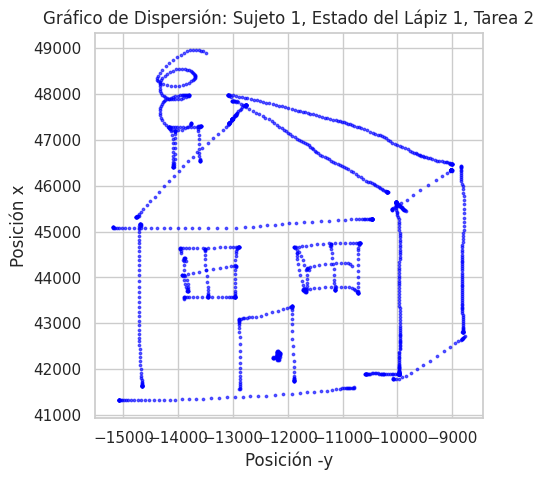

In [33]:
plot_subject_data(subject_id=1, pen_status=1, homework_id=2)

En esta grafica de dispersión, podemos ver la tarea: 2, del sujeto/paciente: 1, la pluma se encuentra abajo.

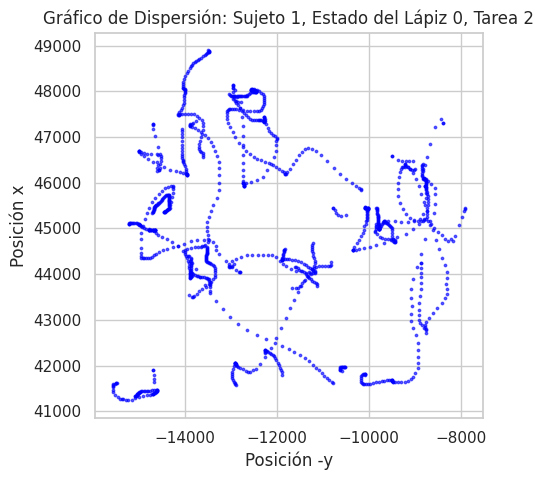

In [34]:
plot_subject_data(subject_id=1, pen_status=0, homework_id=2)

De lo contrario podemos ver cuando la pluma se encuentra arriba.

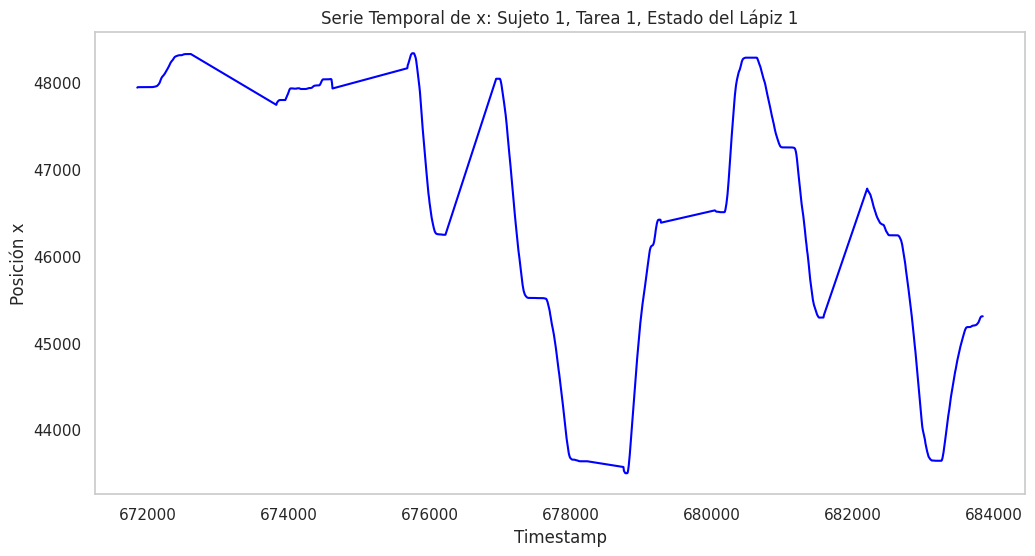

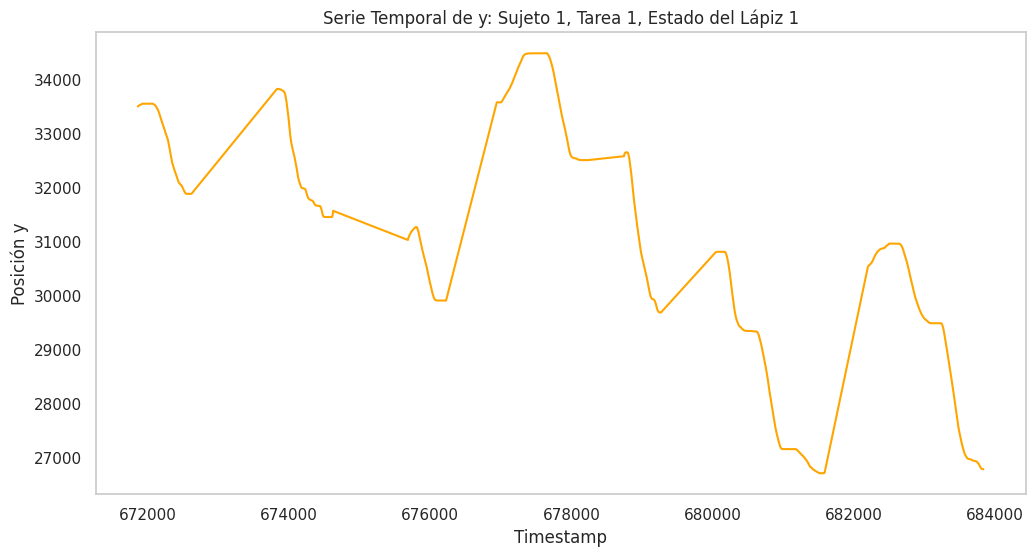

In [21]:
plot_series_data(subject_id=1, homework_id=1, pen_status=1)

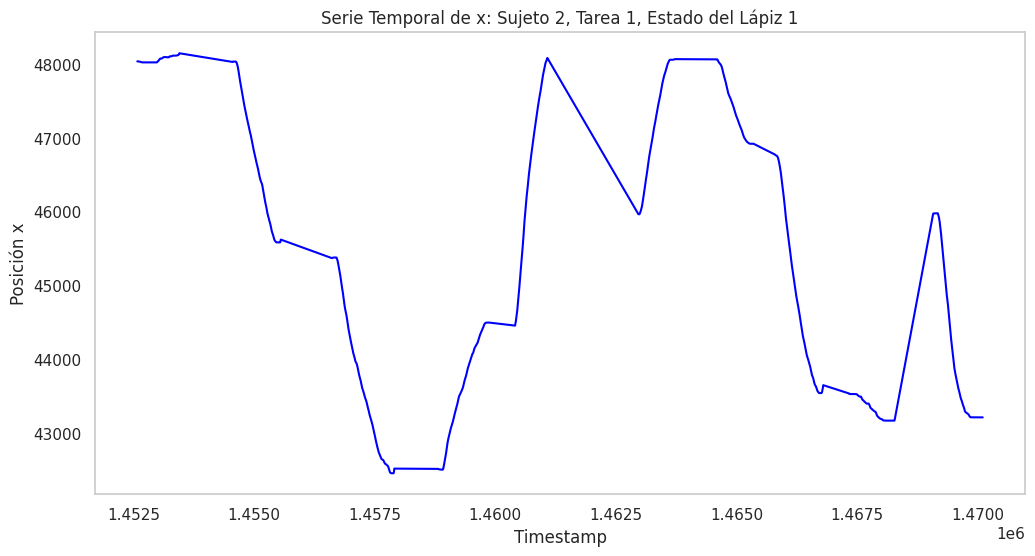

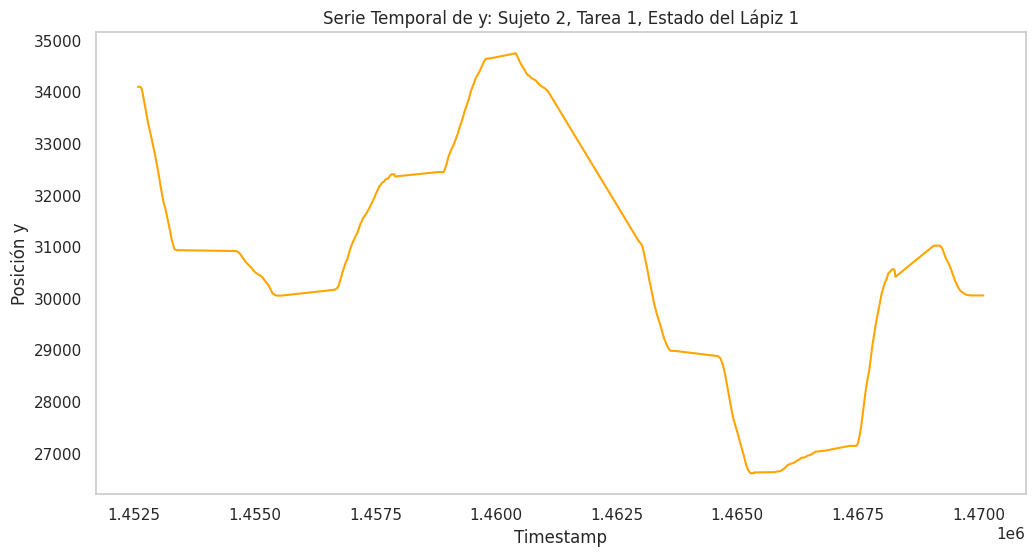

In [58]:
plot_series_data(subject_id=2, homework_id=1, pen_status=1)

### **Visualización de Datos de Series Temporales**

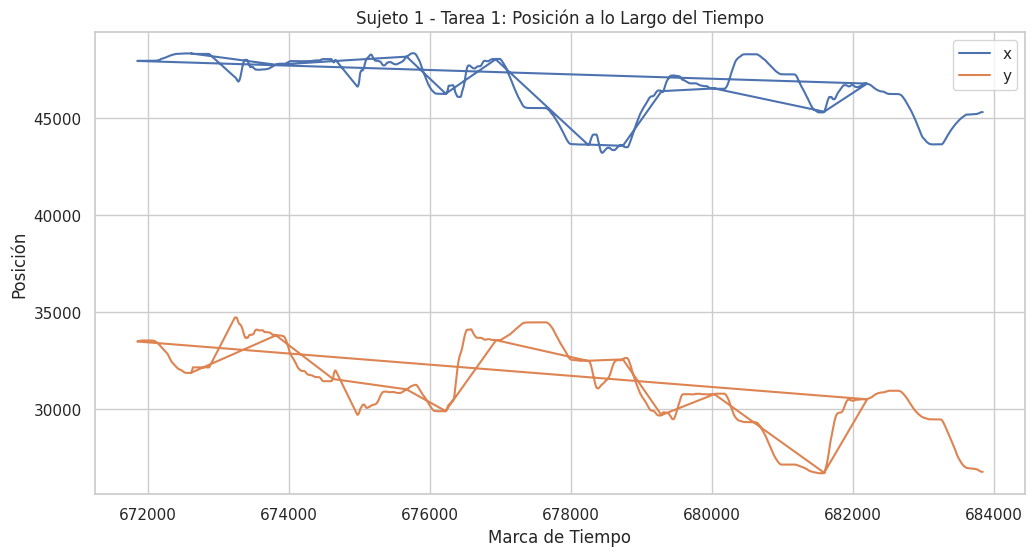

In [22]:
# Graficar series para un sujeto y tarea específicos
subject_id = 1
homework_id = 1

subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                           (df_expanded['homework'] == homework_id)]

# Graficar posiciones x e y a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(subject_data['timestamp'], subject_data['x'], label='x')
plt.plot(subject_data['timestamp'], subject_data['y'], label='y')
plt.title(f"Sujeto {subject_id} - Tarea {homework_id}: Posición a lo Largo del Tiempo")
plt.xlabel("Marca de Tiempo")
plt.ylabel("Posición")
plt.legend()
plt.show()

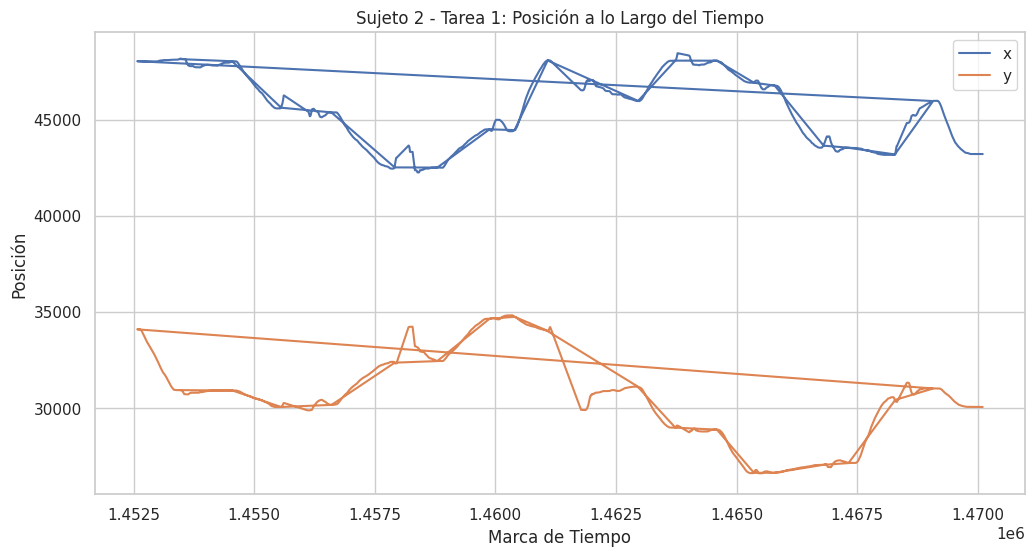

In [59]:
# Graficar series para un sujeto y tarea específicos
subject_id = 2
homework_id = 1

subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                           (df_expanded['homework'] == homework_id)]

# Graficar posiciones x e y a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(subject_data['timestamp'], subject_data['x'], label='x')
plt.plot(subject_data['timestamp'], subject_data['y'], label='y')
plt.title(f"Sujeto {subject_id} - Tarea {homework_id}: Posición a lo Largo del Tiempo")
plt.xlabel("Marca de Tiempo")
plt.ylabel("Posición")
plt.legend()
plt.show()

Aquí tenemos visualización de la serie de tiempo del paciente/sujeto: 1, la tarea: 1 y el lápiz abajo, lo cual significa que el sujeto estuvo tocando la tableta donde se obtuvieron los datos, con esto podemos crear una grafica con los puntos x y y, estas posiciones se pueden observar a lo largo del tiempo.

De igual manera cuando comparamos las graficas con el segundo sujeto haciendo las mismas actividades podemos observar un patrón algo similar, esto tiene sentido ya que están realizando la misma actividad, si comparamos a 2 personas haciendo la misma actividad estarán haciendo algo similar para llegar al mismo objetivo aunque lo hagan de una manera distinta con tiempos distintos.

## **Preprocesamiento de los datos**

### **Manejo de Valores Faltantes**

Nuevamente, como se había mencionado, no hay necesidad de realizar alguna técnica o algoritmo para datos faltantes en nuestro set de datos.

### **Manejo de Valores Atípicos**

In [23]:
# Crear una copia del dataframe original para el preprocesamiento
df_processed = df.copy()

# Detectar y manejar valores atípicos usando el método IQR
for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Limitar valores atípicos
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

# Mostrar las primeras filas del dataframe procesado
df_processed.head()

,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
Subject,,,,,,,,,,,
1,1.0,0.0,"[48331, 48318, 48305, 48305, 48305, 48305, 483...","[31876, 31963, 32053, 32159, 32159, 32159, 321...","[672620, 672628, 672635, 672643, 672650, 67282...","[1830, 1830, 1830, 1830, 1830, 1830, 1830, 234...","[530, 530, 530, 530, 530, 530, 530, 350, 360, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0
1,1.0,1.0,"[47944, 47949, 47949, 47950, 47950, 47950, 479...","[33492, 33506, 33512, 33515, 33519, 33524, 335...","[671854, 671861, 671869, 671876, 671884, 67189...","[1800, 1800, 1800, 1800, 1800, 1810, 1810, 181...","[490, 500, 500, 500, 500, 500, 500, 500, 500, ...","[67, 148, 193, 228, 270, 306, 341, 365, 381, 3...",2.0,8.0,13.0
1,2.0,0.0,"[41647, 41714, 41787, 41896, 41896, 41616, 416...","[14655, 14657, 14675, 14677, 14677, 15475, 154...","[692915, 692922, 692930, 692937, 692945, 69356...","[1830, 1830, 1830, 1840, 1840, 2530, 2530, 253...","[530, 530, 530, 530, 530, 450, 450, 450, 460, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0
1,2.0,1.0,"[45074, 45128, 45144, 45158, 45164, 45169, 451...","[14676, 14676, 14679, 14689, 14696, 14701, 147...","[692434, 692441, 692449, 692456, 692464, 69247...","[1930, 1940, 1940, 1940, 1940, 1940, 1940, 194...","[510, 510, 510, 510, 510, 510, 510, 510, 510, ...","[50, 207, 282, 304, 377, 418, 426, 438, 447, 4...",2.0,8.0,13.0
1,3.0,0.0,"[33431, 33563, 33626, 33685, 33747, 33812, 338...","[35956, 35956, 35959, 35976, 35991, 36002, 360...","[724897, 724905, 724912, 724920, 724927, 72493...","[1760, 1760, 1760, 1760, 1760, 1760, 1770, 177...","[620, 610, 610, 610, 610, 610, 600, 600, 600, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0


En esta sección se está aplicando un preprocesamiento usando el método IQR, os límites inferior y superior para posibles valores atípicos en las columnas numéricas.

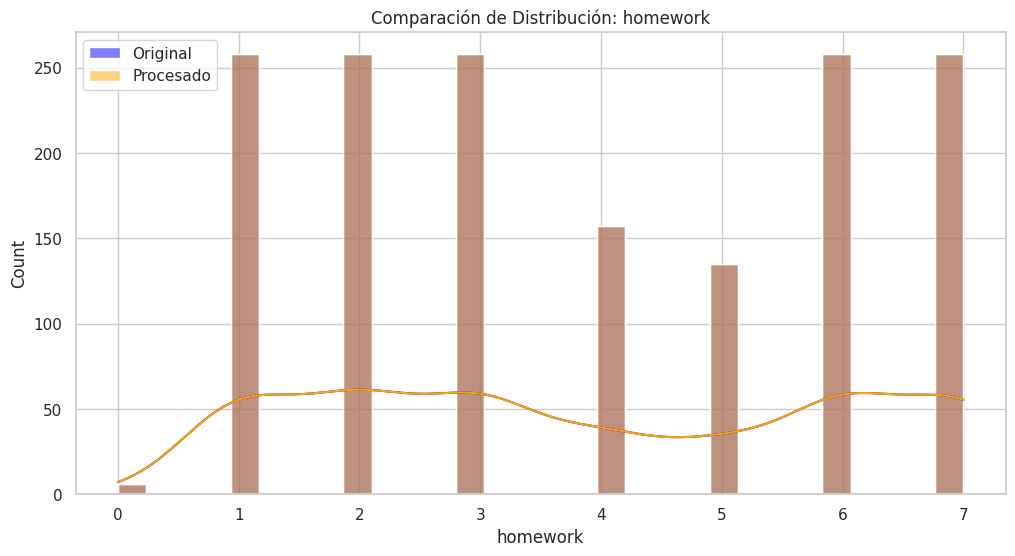

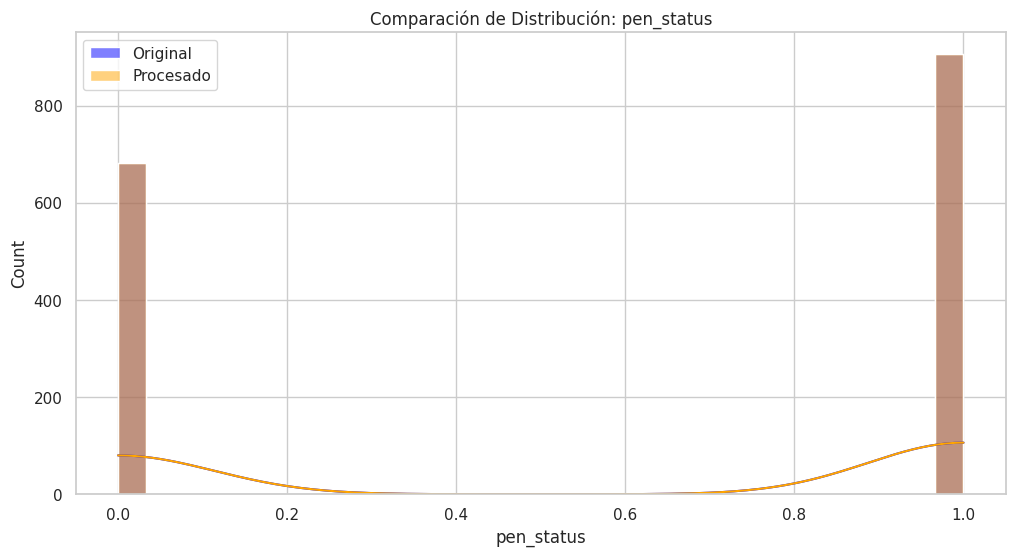

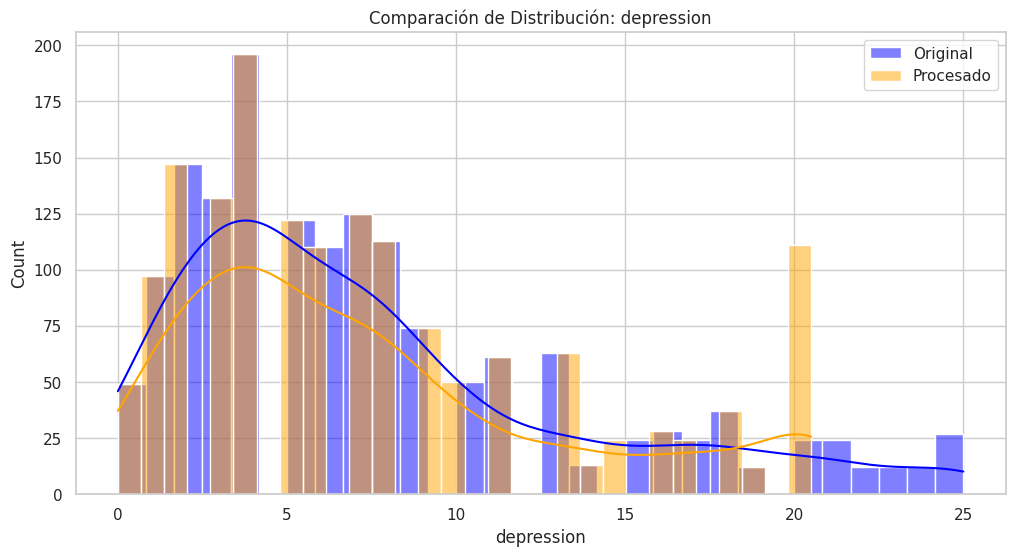

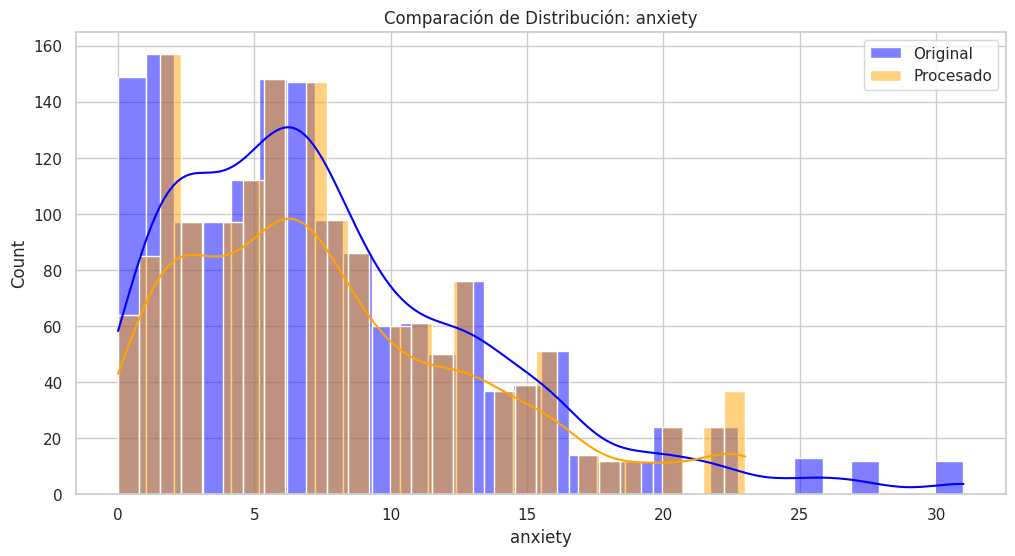

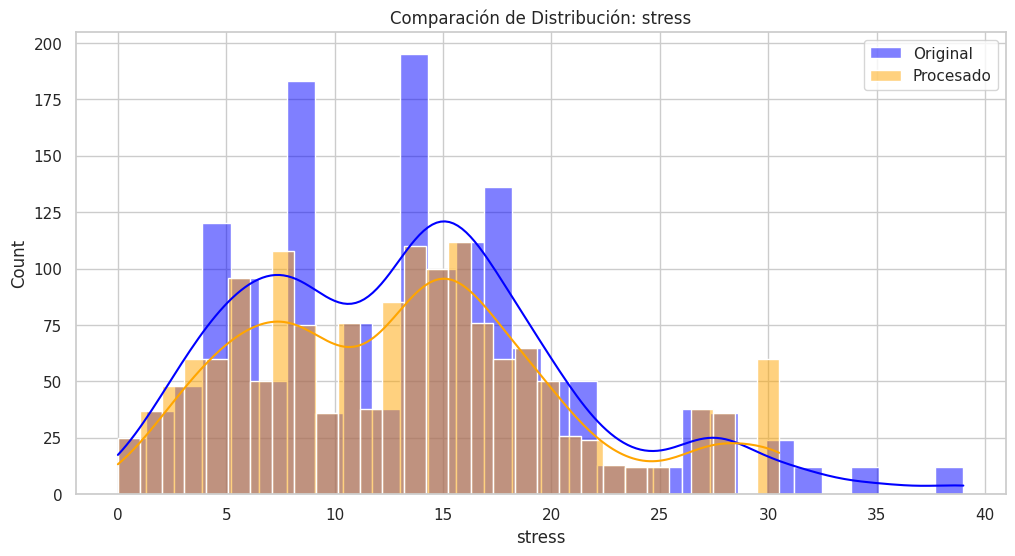

In [24]:
# Graficar distribución antes y después del preprocesamiento
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True, color='blue', label='Original', bins=30)
    sns.histplot(df_processed[col], kde=True, color='orange', label='Procesado', bins=30)
    plt.title(f"Comparación de Distribución: {col}")
    plt.legend()
    plt.show()

Ahora comparando ambos datos podemos ver los cambios dentro de los sesgos, los originales por lo general están sesgados a la izquierda, mientras que con los nuevos cambios se estandarizan más los valores, y prácticamente eliminado los valores atípicos.

### **Aplicación de transformación wavelet (WDT)**


In [54]:
def extract_wavelet_features(data_list, wavelet='db4', level=1):
    """
    Aplicar la Transformada Wavelet a una lista de datos y extraer características.

    Parámetros:
    data_list = lista de datos a usar.
    wavelet = transformacion wavelet a usar (Daubechies 4 wavelet)
    level = número de veces que se realiza el proceso de descomposición en una señal o imagen
    """
    coeffs = pywt.wavedec(data_list, wavelet, level=level)
    features = []
    for coef in coeffs:
        features.extend([
            np.mean(coef),
            np.std(coef),
            np.min(coef),
            np.max(coef)
        ])
    return features

**Ejemplo de aplicación wavelet a la columna de series de tiempo X**

Para este ejemplo estaremos haciendo uso de los datos que se acaban de procesar.

In [55]:
# Inicializar listas para la matriz de características
DWT_features = []

# Iterar a una fila en el conjunto de datos
for _, row in df_processed.iterrows():
    row_features = []

    # Procesar la columna relevante, en este caso la columna X
    for col in ['x']:
        row_features.extend(extract_wavelet_features(row[col]))

    # Agregar las características a la lista
    DWT_features.append(row_features)

# Convertir lista a un arreglo
DWT_array = np.array(DWT_features)

# Arreglo de caracterizticas
print("caracterizticas procesadas:", DWT_array.shape)

/usr/local/lib/python3.11/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(


caracterizticas procesadas: (1588, 8)


**Ejemplo de aplicación wavelet a todas las columnas de la serie de tiempo**

In [57]:
# Inicializar listas para la matriz de características
DWT_features = []

# Iterar a una fila en el conjunto de datos
for _, row in df_processed.iterrows():
    row_features = []

    # Procesar la columna relevante, en este caso la columna X
    for col in ['x', 'y', 'timestamp', 'altitude', 'pressure', 'azimuth']:
        row_features.extend(extract_wavelet_features(row[col]))

    # Agregar las características a la lista
    DWT_features.append(row_features)

# Convertir lista a un arreglo
DWT_array = np.array(DWT_features)

# Arreglo de caracterizticas
print("caracterizticas procesadas:", DWT_array.shape)

caracterizticas procesadas: (1588, 48)


**Preguntas a contestar despues de abordar el EDA**

**¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

R: El set de datos no tiene ningún conjunto de datos faltantes

**¿Cuáles son las estadísticas resumidas del conjunto de datos?**
**¿Hay valores atípicos en el conjunto de datos?**

R: Sabemos que existen un máximo de 7 tareas existentes en la columna de **tareas**, el estatus de la pluma son valores de 0 y 1, donde existen ligeramente mas valores en 1, X y Y son nuestras coordenadas de x y y de la escritura sobre tiempo, **Azimut** es el ángulo, generalmente medido en grados, entre la dirección de un objeto (o señal) y una dirección de referencia, la **altitud** se refiere al ángulo entre el lápiz y la superficie de la tableta, La **presión** es la presión obtenida en la escritura y nuestras etiquetas serían los valores designados a las emociones como **depresión, ansiedad y estrés**

Las únicos datos que actualmente parecen tener datos sesgados, serian las etiquetas ya que los resultados varían bastante dependiendo de la ejecución de los usuarios, a diferencia de los datos obtenidos a través del tiempo, esto es algo observable en las tablas obtenidas dentro del documento.

**¿Cuál es la cardinalidad de las variables categóricas?**

*   Cardinalidad:
*   Tareas: 8
*   Estatus de pluma: 2
*   Depresión: 25
*   Ansiedad: 25
*   Estrés: 33

**¿Existen distribuciones sesgadas en el conjunto de datos?**

R: Las únicos datos que actualmente parecen tener datos sesgados, serian las etiquetas.

**¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).**

R; Por la naturaleza de los datos, En general siguen un mismo patrón en especial al realizar las misma tareas pero varían dependiendo de la información de cada usuario o paciente, en ese aspecto podriamos argumentar  que los datos se pueden considerar como un poco ruidosas, en otras palabras, variaciones aleatorias o impredecibles en los datos que no siguen ningún patrón claro.

**¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)**

R: Por lo general las etiquetas tienen una correlacion, el resto de los datos, tienen su propia distrubicion, por ejemplo el estatus de la pluma solo tiene una distrbucion binaria (0 y 1).

**¿Se deberían normalizar las imágenes para visualizarlas mejor?**

R: El set de datos no requiere normalizacion de imagenes, ya que usa pricnipalmente series de tiempo

**¿Hay desequilibrio en las clases de la variable objetivo?**

R: Existe un ligero desbalance en las etiquetas ya que los pacientes tienen datos de mayor cantidad o existe paciente que sufre estres mas que ansiedad y depresion.


## **Conclusiones**

Después de realizar el EDA, nos pudimos familiarizar mas con los datos que estaremos trabajando y las tendencias que existen dentro de nuestros datos, de manera general consideramos que los puntos mas importantes a considerar son los siguientes:

*   **homework:** Podemos observar que hay un mínimo de 0 tareas y 7 como máximo.
*   **pen_status:** El valor medio es 0,57, lo que sugiere que la mayoría de las muestras se encuentran con el valor de 1.
*   El valor máximo de **depression, anxiety y stress:** es 25, 15 y 39, respectivamente.

*   El valor mas alto siendo 39 de **stress**

*   Existen datos atípicos principalmente en las etiquetas de nuestros datos, de los cuales las etiquetas tienen correlación consigo mismas.

*   En las series de tiempo, especialmente cuando hablamos de coordenadas X y Y, tiene la misma tendencia cuando se comparan las mismas tareas en diferentes pacientes. Esto tiene sentido ya que están realizando una tarea similar pero no es lo mismo.
